In [1]:
from top_down_sorting import *
from vis import *
import numpy as np
import pickle

In [2]:
# Load SPRITE data
import sys
sys.path.append("incidence_data_structure")
from miarep_data_loader.load_csr import load_csr
from miarep_data_loader.preprocessed_data import PreprocessedData

As : dict[str, dict[str, PreprocessedData]] = load_csr()
print(As.keys())
for key in As.keys():
    print(As[key].keys())



2026-02-12 13:56:45,865 - INFO - Preprocessing SPRITE_GM12878
2026-02-12 13:56:45,866 - INFO - Loading cache: out/cache/SPRITE/GM12878;bs=300kb;gr=None;chr=19.pkl
2026-02-12 13:56:45,879 - INFO - Preprocessing SPRITE_H1_hESC_undiff_rep1
2026-02-12 13:56:45,879 - INFO - rep fname list: {1: 'Data/H1-hESC_undiff_rep1.clusters', 2: 'Data/H1-hESC_undiff_rep2.clusters'}
2026-02-12 13:56:45,880 - INFO - Reading Data/H1-hESC_undiff_rep1.clusters...
2026-02-12 13:56:45,882 - ERROR - File not found: Data/H1-hESC_undiff_rep1.clusters


dict_keys(['SPRITE_GM12878'])
dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])


In [3]:
result : PreprocessedData = As['SPRITE_GM12878']['A']
raw_csr = csr_matrix(result.H.T)
raw_weights = result.W
print(raw_csr)
print(raw_weights)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 93297 stored elements and shape (20722, 196)>
  Coords	Values
  (0, 145)	1.0
  (1, 33)	1.0
  (2, 40)	1.0
  (3, 5)	1.0
  (3, 37)	1.0
  (4, 8)	1.0
  (5, 47)	1.0
  (6, 9)	1.0
  (6, 18)	1.0
  (7, 54)	1.0
  (8, 100)	1.0
  (8, 172)	1.0
  (9, 169)	1.0
  (10, 44)	1.0
  (11, 108)	1.0
  (11, 126)	1.0
  (12, 6)	1.0
  (12, 110)	1.0
  (13, 4)	1.0
  (14, 180)	1.0
  (15, 6)	1.0
  (16, 135)	1.0
  (17, 27)	1.0
  (17, 153)	1.0
  (18, 93)	1.0
  :	:
  (20721, 37)	1.0
  (20721, 58)	1.0
  (20721, 59)	1.0
  (20721, 60)	1.0
  (20721, 61)	1.0
  (20721, 62)	1.0
  (20721, 128)	1.0
  (20721, 129)	1.0
  (20721, 130)	1.0
  (20721, 131)	1.0
  (20721, 132)	1.0
  (20721, 133)	1.0
  (20721, 134)	1.0
  (20721, 135)	1.0
  (20721, 151)	1.0
  (20721, 152)	1.0
  (20721, 153)	1.0
  (20721, 155)	1.0
  (20721, 171)	1.0
  (20721, 172)	1.0
  (20721, 174)	1.0
  (20721, 175)	1.0
  (20721, 176)	1.0
  (20721, 177)	1.0
  (20721, 178)	1.0
[296 256 123 ...   1   1   1]


In [ ]:
# Visualize SPRITE
# matrix_heatmap(raw_csr.toarray(), title='Raw data')

In [ ]:
# # Load raw data csr matrix
# datafile = 'example2.pkl'
# with open(datafile, "rb") as f:
#     raw_csr : csr_matrix = pickle.load(f).tocsr()
# perm = np.random.permutation(raw_csr.shape[0])
# raw_csr = raw_csr[perm]
# matrix_heatmap(raw_csr.toarray(), title='Raw data')

# m, n = raw_csr.shape
# raw_weights = np.ones(shape=(m,))

Starting m, n = (20722, 196)


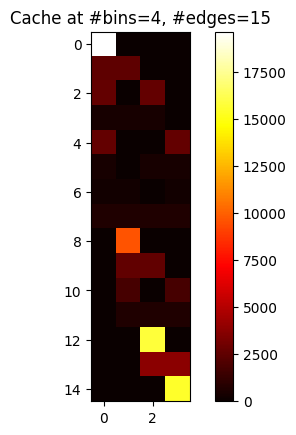

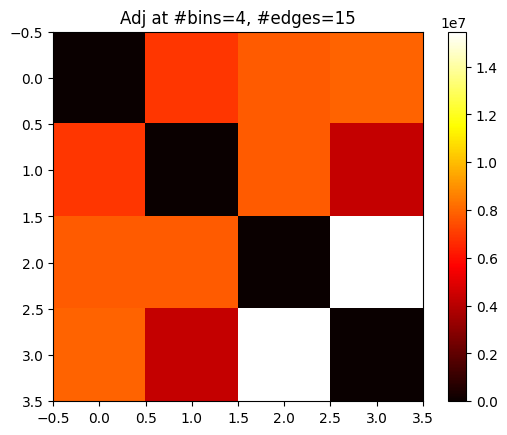

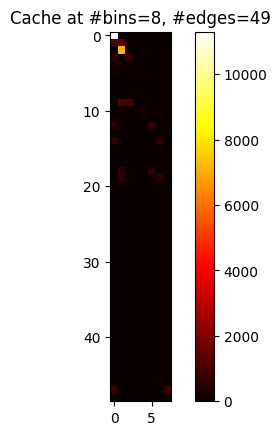

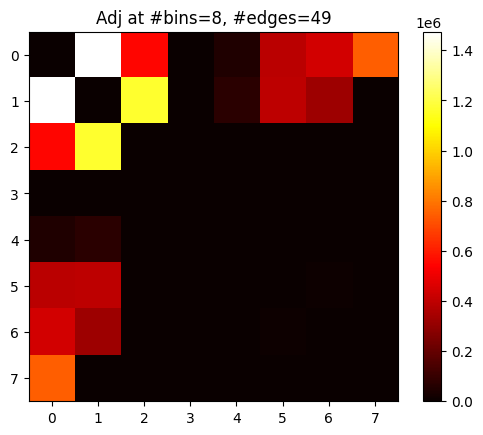

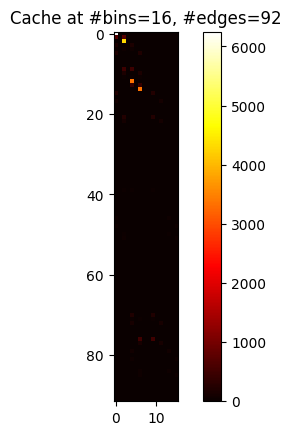

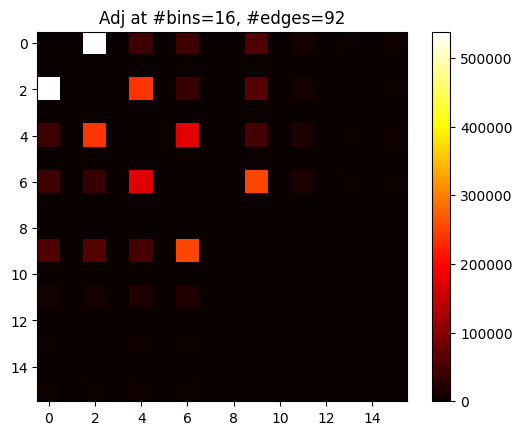

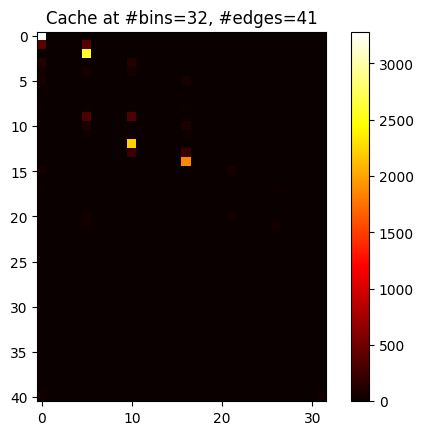

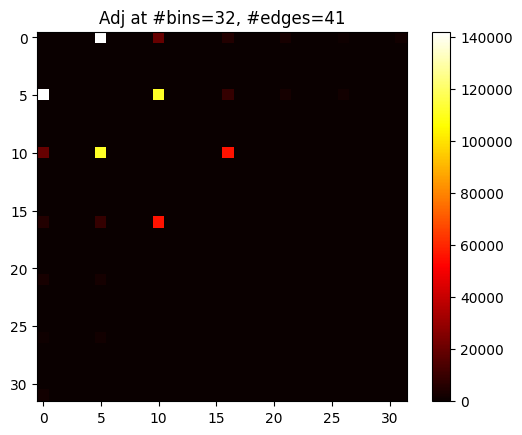

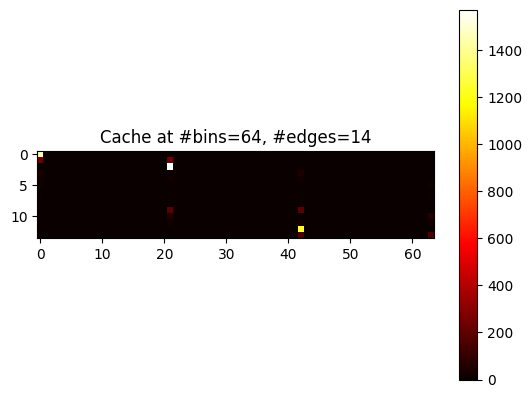

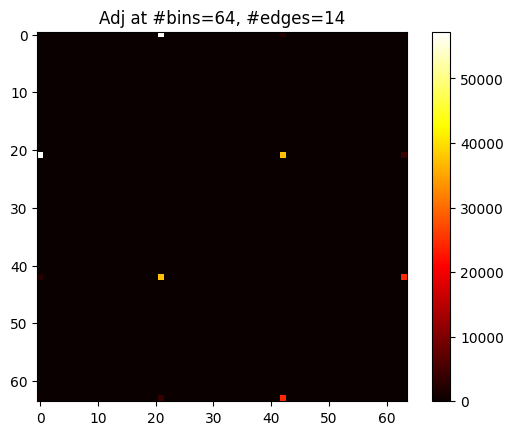

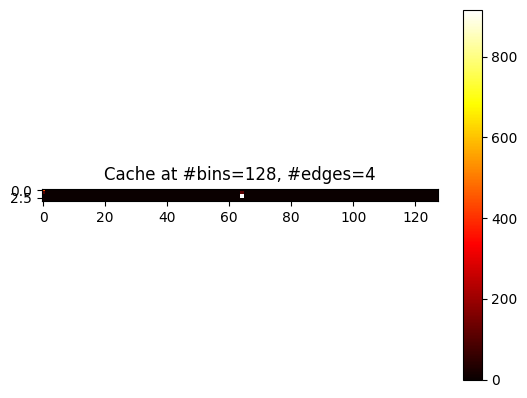

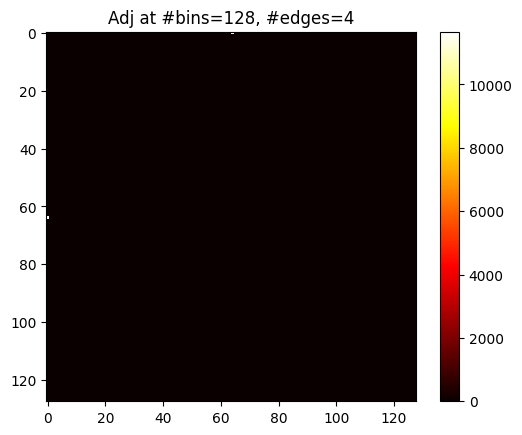

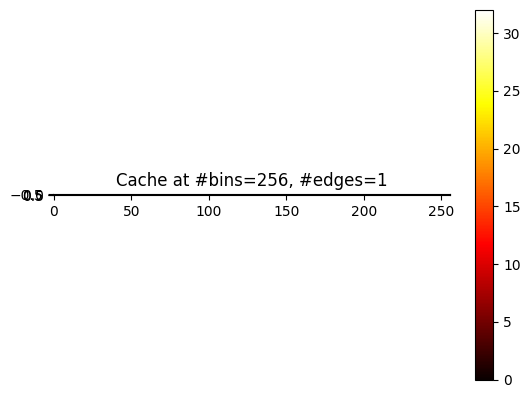

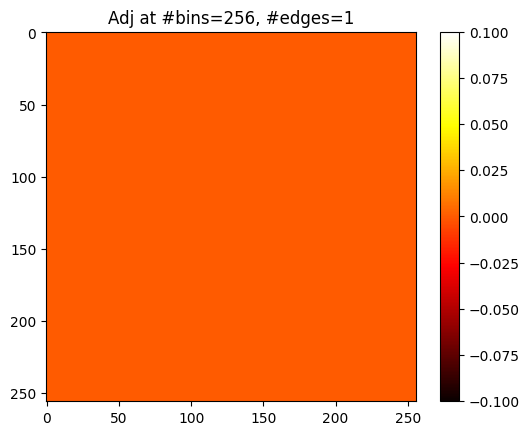

In [6]:
# Build heirarchical cache
m, n = raw_csr.shape
print(f'Starting m, n = {m, n}')
min_n, max_n = 4, 256

sorter = TopDownSorting(raw_csr.copy(), raw_weights)

zoom_proportion = 0.2

zoom_level = 0
for H, W, _ in sorter.build_cache((min_n, max_n)):
    H_dense = np.diag(W) @ H.toarray()

    num_rows_to_keep = int(zoom_proportion ** zoom_level * H.shape[0])
    H_dense = H_dense[: num_rows_to_keep]
    current_m, current_n = H_dense.shape


    matrix_heatmap(H_dense, title=f'Cache at #bins={current_n}, #edges={current_m}')
    A : np.ndarray = H_dense.T @ H_dense
    np.fill_diagonal(A, 0)
    matrix_heatmap(A, title=f'Adj at #bins={current_n}, #edges={current_m}')
    #print(f"cropping at first {int(num_rows_to_keep * zoom_proportion)} rows. ")
    zoom_level += 1

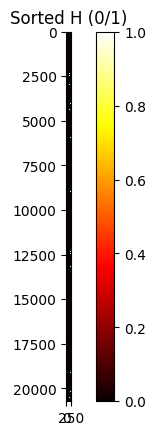

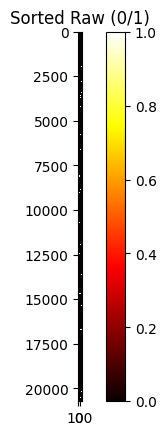

In [ ]:
# Sanity check - highest resolution should lok like raw data

H_final = H.tocsr()
raw = raw_csr.tocsr()

#assert H_final.shape == raw.shape

H_rows = sorted(map(tuple, H_final.toarray()))
raw_rows = sorted(map(tuple, raw.toarray()))

H_sorted = np.array(H_rows)
raw_sorted = np.array(raw_rows)

matrix_heatmap(H_sorted, title="Sorted H (0/1)")
matrix_heatmap(raw_sorted, title="Sorted Raw (0/1)")
